In [185]:
import pandas as pd, numpy as np, json, os
import networkx as nx
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
plt.style.use('seaborn-whitegrid')

In [82]:
m=json.loads(open('ignore/member_timelines.json','r').read())

In [83]:
set([i['Csoportok'] for i in m if i['Típus']=='Párt'])

{'⚛️ PP-DD - Partidul Poporului Dan Diaconescu',
 '⚪️ FDSN - Frontul Democrat al Salvarii Nationale',
 '⚪️ FSN - Frontul Salvării Naţionale',
 '✳️ PNTCD - Partidul Naţional Ţărănesc Creştin Democrat',
 '🌷 RMDSZ - Romániai Magyar Demokrata Szövetség',
 '🌹 PDSR - Partidul Democraţiei Sociale din România',
 '🌹 PSD - Partidul Social Democrat',
 '🌹 PSDR - Partidul Social Democrat Român',
 '🌹 PSM - Partidul Socialist al Muncii',
 '🍀 FER - Federaţia Ecologistă Română',
 '🍀 MER - Mişcarea Ecologistă din România',
 '🍀 PDAR - Partidul Democrat Agrar din România',
 '🍀 PER - Partidul Ecologist Român',
 '🍏 PMP - Partidul Mişcarea Populară',
 '👤 Independent - Independent',
 '👤 Minorități - Minorități',
 '📐 PAC - Partidul Alianţei Civice',
 "📐 PL'93 - Partidul Liberal",
 '📐 PNL - Partidul Naţional Liberal',
 '📐 PNL-AT - Partidul Naţional Liberal',
 '📐 PNL-CD - Partidul Naţional Liberal',
 '🔘 AUR - Alianţa pentru Unitatea Românilor',
 '🔘 FC - Forţa Civică',
 '🔘 GDC - Gruparea Democratică de Centru',
 

In [84]:
# m=m[:1000]

In [85]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
3.302728053372085 %
6.60545610674417 %
9.908184160116255 %
13.21091221348834 %
16.513640266860428 %
19.81636832023251 %
23.1190963736046 %
26.42182442697668 %
29.72455248034877 %
33.027280533720855 %
36.33000858709294 %
39.63273664046502 %
42.93546469383711 %
46.2381927472092 %
49.540920800581276 %
52.84364885395336 %
56.14637690732545 %
59.44910496069754 %
62.751833014069625 %
66.05456106744171 %
69.35728912081379 %
72.66001717418588 %
75.96274522755796 %
79.26547328093004 %
82.56820133430213 %
85.87092938767422 %
89.1736574410463 %
92.4763854944184 %
95.77911354779047 %
99.08184160116255 %


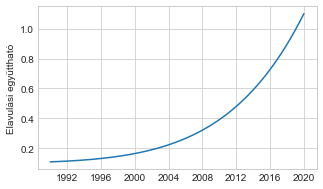

In [188]:
def anneal(t,p=7):
    #pd.to_datetime('2020-01-01')-pd.to_datetime('1989-01-01')=11322
    return (2-(pd.to_datetime('2020-01-01')-pd.to_datetime(t)).days/11322)**p
    
tanneal={}
anneal2020=anneal(pd.to_datetime('2020'))
for t in pd.date_range('1990','2020'):
    tanneal[t]=anneal(t)/anneal2020+0.1
    tanneal[str(t)[:10]]=tanneal[t]
plt.subplots(1,1,figsize=(5,3))
plt.plot(tanneal.keys(),tanneal.values())
plt.ylabel('Elavulási együttható')
plt.show()

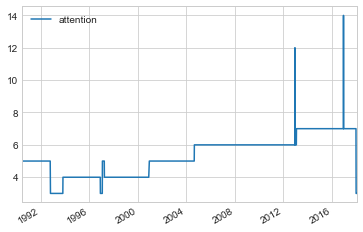

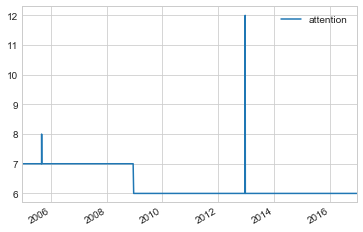

In [189]:
att=pd.DataFrame(attention['Verestoy Attila | 1954-03-01'],index=['attention']).T
att.index=pd.to_datetime(att.index)
att.plot()
att=pd.DataFrame(attention['Chelaru Ioan | 1953-02-10'],index=['attention']).T
att.index=pd.to_datetime(att.index)
att.plot()

In [87]:
edges={}
points={'Ország':3,'Bizottság':4,'Párt':2,'Megye':1}
for tipus in data:
    for csoport in data[tipus]:
        print(csoport)
        for t in data[tipus][csoport]:
            names=list(data[tipus][csoport][t])
            for r in range(len(names)):
                name=names[r]
                for p in range(r+1,len(names)):
                    name2=names[p]
                    nset=tuple(np.sort([name,name2]))
                    v=points[tipus]
                    if nset not in edges:edges[nset]={'anneal':0,'values':0}
                    edges[nset]['values']+=v
                    edges[nset]['anneal']+=v*tanneal[t]

🇨🇾 Ciprus
🇩🇰 Dánia
🇯🇵 Japán
🇦🇺 Ausztrália
🇪🇸 Spanyolország
🇮🇹 Olaszország
🇱🇧 Libanon
🇲🇳 Mongólia
🇩🇪 Németország
🇬🇳 Guinea
🇬🇷 Görögország
🇭🇺 Magyarország
🇱🇻 Lettország
🇵🇱 Lengyelország
🇵🇹 Portugália
🇫🇷 Franciaország
🇸🇾 Szíria
🇸🇪 Svédország
🇹🇷 Törökország
🇧🇪 Belgium
🇨🇮 Elefántcsontpart
🇬🇧 Egyesült Királyság
🇮🇱 Izrael
🇮🇳 India
🇿🇦 Dél-Afrika
🇪🇬 Egyiptom
🇵🇪 Peru
🇰🇷 Dél-Korea
🇲🇹 Málta
🇦🇹 Ausztria
🇧🇬 Bulgária
🇨🇦 Kanada
🇬🇪 Grúzia
🇲🇽 Mexikó
Más ország
🇲🇦 Marokkó
🇨🇷 Costa Rica
🇰🇼 Kuvait
🇰🇿 Kazahsztán
🇸🇦 Szaúd-Arábia
🇧🇷 Brazília
🇱🇺 Luxemburg
🇨🇳 Kína
🇪🇨 Ecuador
🇻🇪 Venezuela
Jugoszlávia
🇯🇴 Jordánia
🇧🇾 Fehéroroszország
🇨🇺 Kuba
🇫🇮 Finnország
🇲🇰 Macedónia
🇹🇳 Tunézia
🇺🇦 Ukrajna
🇪🇪 Észtország
🇶🇦 Katar
🇧🇭 Bahrein
🇸🇰 Szlovákia
🇧🇴 Bolívia
🇮🇶 Irak
🇺🇸 Egyesült Államok
🇨🇬 Kongó
🇮🇸 Izland
🇸🇬 Szingapúr
🇨🇴 Kolumbia
🇸🇩 Szudán
🇱🇹 Litvánia
🇷🇸 Szerbia
🇩🇿 Algéria
🇹🇲 Türkmenisztán
🇺🇾 Uruguay
🇦🇲 Örményország
🇦🇱 Albánia
🇵🇦 Panama
🇮🇷 Irán
🇨🇿 Czechia
🇳🇴 Norvégia
🇧🇦 Bosznia-Hercegovina
🇳🇱 Hollandia
🇹🇭 Thaiföld
🇵🇭 Fülöp-szi

Save

In [88]:
import pickle

In [89]:
def save_obj(obj, name ):
    with open('ignore/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('ignore/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [90]:
save_obj(edges,'plotter_name_edges')

In [91]:
#edges=load_obj('plotter_name_edges')

Prune

In [209]:
df=pd.DataFrame(edges).T

Unweighted

In [300]:
all_nodes=set(df.reset_index()['level_0']).union(df.reset_index()['level_1'])
nodes={}
for i in all_nodes:
    if i not in nodes:
        nodes[i]={'pr':0,'bc':0,'cf':0}

In [301]:
min_baratsag=365*2*4  #average bizottsag-barastag * hany ev
df2=df[df['anneal']>min_baratsag]
df2['regi']=df2['anneal']/df2['values']
df2=df2['anneal'].reset_index()
df2.columns=['source','target','weight']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [302]:
G=nx.Graph(df2)

r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['pr']=r[i]/mr
    
Gc = max(nx.connected_component_subgraphs(G), key=len)
r = nx.current_flow_closeness_centrality(Gc,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['cf']=r[i]/mr
    
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z

In [303]:
#save 
network={'nodes':nodes,'links':links}
print(len(nodes),'nodes and',len(G.edges()),'edges')
open('ignore/plotter_name.json','w').write(json.dumps(network))
import zipfile

with zipfile.ZipFile("json/plotter_name.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name.json",'plotter_name.json')

2818 nodes and 37938 edges


In [ ]:
#Normalize links by their average weighted in-degree node? create directed graph
#mixture of relative value and absolute value links
#of course ven more realistic do do it through the attention, yeear by year

Weighted

In [306]:
lv={i:edges[i]['anneal'] for i in edges}
sorted_x = sorted(lv.items(), key=operator.itemgetter(1))
sorted_x[-20:]

[(('Resmerita Cornel-Cristian | 1980-01-26',
   'Vasilica Radu Costin | 1976-06-02'),
  13023.906199653538),
 (('Moga Nicolae | 1952-10-25', 'Stefan Viorel | 1954-07-26'),
  13103.594316293991),
 (('Nicolae Serban | 1968-04-05', 'Vlase Petru Gabriel | 1971-04-03'),
  13142.164414761828),
 (('Borbely Laszlo | 1954-03-26', 'Kerekes Karoly | 1947-12-14'),
  13241.850836103771),
 (('Buican Cristian | 1966-09-16', 'Neagu Nicolae | 1959-12-06'),
  13410.538124961631),
 (('Tilvar Angel | 1962-02-11', 'Zgonea Valeriu Stefan | 1967-09-03'),
  13411.678571674829),
 (('Kerekes Karoly | 1947-12-14', 'Marko Bela | 1951-09-08'),
  13605.25838985479),
 (('Bode Lucian Nicolae | 1974-10-27', 'Ionescu George | 1968-03-31'),
  13630.459322125109),
 (('Ignat Miron | 1941-08-24', 'Stefan Viorel | 1954-07-26'),
  13685.663959859243),
 (('Iancu Iulian | 1960-10-06', 'Nosa Iuliu | 1956-09-25'),
  14043.564924849079),
 (('Nosa Iuliu | 1956-09-25', 'Stefan Viorel | 1954-07-26'),
  14056.690429439726),
 (('Croit

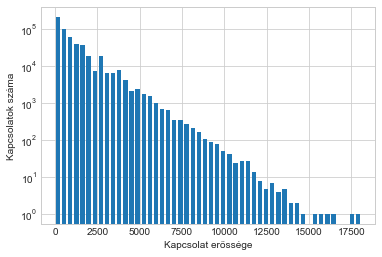

In [307]:
plt.hist(lv.values(),bins=50,rwidth=0.7);
plt.yscale('log')
plt.xlabel('Kapcsolat erőssége');
plt.ylabel('Kapcsolatok száma');

In [396]:
dflog=df.reset_index()
dflog['log']=np.log(dflog['anneal'])
mean0=dflog.groupby('level_0').median()[['log']]
mean1=dflog.groupby('level_1').median()[['log']]
mean0.columns=['mean0']
mean1.columns=['mean1']
dfm=mean0.join(mean1)

count0=dflog.groupby('level_0').count()[['log']]
count1=dflog.groupby('level_1').count()[['log']]
count0.columns=['count0']
count1.columns=['count1']
dfc=count0.join(count1)

In [397]:
dfm=dfm.T.fillna(method='pad').T
dfm['mean']=(dfm['mean0']+dfm['mean1'])/2

dfc=dfc.fillna(0)
dfc['total']=(dfc['count0']+dfc['count1'])

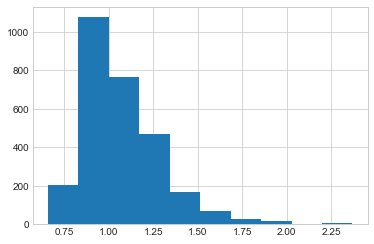

In [398]:
dfm=dfm.join(dfc)
dfm['intensity']=dfm['mean']/dfm['total']
dfm['attention']=(dfm['total'].mean()/dfm['total'])**0.3
dfm['attention'].hist()

In [399]:
dfm.sort_values(by='mean').tail(10)

mean0     mean1      mean  count0  \
level_0                                                                        
Arcan Emilia | 1965-02-13               7.436720  7.842185  7.639452     388   
Wiener Adrian | 1973-06-23              7.842185  7.436720  7.639452       3   
Ungureanu Emanuel-Dumitru | 1978-03-12  7.842185  7.436720  7.639452      16   
Simionca Ioan | 1963-07-21              7.842185  7.436720  7.639452      29   
Pataki Csaba | 1973-07-19               7.596846  7.718343  7.657594     116   
Ghera Giureci-Slobodan | 1979-04-15     7.571131  7.842185  7.706658     202   
Popescu Nicolae-Daniel | 1981-05-31     7.720349  7.720349  7.720349      46   
Korodi Attila | 1977-06-23              7.842185  7.612952  7.727569     247   
Avram Constantin | 1954-06-10           7.669168  7.842185  7.755677     259   
Zisopol Dragos Gabriel | 1967-11-12     8.256431  7.555504  7.905968       1   

                                        count1  total  intensity  attention  
level_0                                                                      
Arcan Emilia | 1965-02-13                  8.0  396.0   0.019292   0.995675  
Wiener Adrian | 1973-06-23               127.0  130.0   0.058765   1.390732  
Ungureanu Emanuel-Dumitru | 1978-03-12   197.0  213.0   0.035866   1.199258  
Simionca Ioan | 1963-07-21               151.0  180.0   0.042441   1.261376  
Pataki Csaba | 1973-07-19                285.0  401.0   0.019096   0.991935  
Ghera Giureci-Slobodan | 1979-04-15      133.0  335.0   0.023005   1.046919  
Popescu Nicolae-Daniel | 1981-05-31      124.0  170.0   0.045414   1.283192  
Korodi Attila | 1977-06-23               241.0  488.0   0.015835   0.935191  
Avram Constantin | 1954-06-10              8.0  267.0   0.029047   1.120658  
Zisopol Dragos Gabriel | 1967-11-12      285.0  286.0   0.027643   1.097783

In [400]:
dfm.sort_values(by='total').tail(10)

mean0     mean1      mean  \
level_0                                                                     
Blaga Vasile | 1956-07-26                    6.290365  6.464729  6.377547   
Radulescu Cristian | 1955-11-13              6.459387  6.367045  6.413216   
Man Mircea | 1962-11-26                      6.212016  6.184723  6.198369   
Nicolaescu Sergiu-Florin | 1930-04-13        6.120791  5.763968  5.942379   
Oltean Ioan | 1953-04-20                     6.654727  6.654727  6.654727   
Timis Ioan | 1951-09-17                      5.969900  6.099069  6.034485   
Dumitrescu Cristian-Sorin | 1955-04-24       7.085705  7.187767  7.136736   
Nistor Vasile | 1956-09-08                   6.516151  6.458994  6.487573   
Nicolicea Eugen | 1956-06-06                 6.972722  6.959457  6.966090   
Niculescu Duvaz Bogdan Nicolae | 1948-12-14  6.356670  6.120791  6.238731   

                                             count0  count1   total  \
level_0                                                               
Blaga Vasile | 1956-07-26                      1212   123.0  1335.0   
Radulescu Cristian | 1955-11-13                 307  1047.0  1354.0   
Man Mircea | 1962-11-26                         672   692.0  1364.0   
Nicolaescu Sergiu-Florin | 1930-04-13           512   869.0  1381.0   
Oltean Ioan | 1953-04-20                        499   884.0  1383.0   
Timis Ioan | 1951-09-17                         119  1271.0  1390.0   
Dumitrescu Cristian-Sorin | 1955-04-24         1007   404.0  1411.0   
Nistor Vasile | 1956-09-08                      507   912.0  1419.0   
Nicolicea Eugen | 1956-06-06                    551   915.0  1466.0   
Niculescu Duvaz Bogdan Nicolae | 1948-12-14     564  1012.0  1576.0   

                                             intensity  attention  
level_0                                                            
Blaga Vasile | 1956-07-26                     0.004777   0.691484  
Radulescu Cristian | 1955-11-13               0.004736   0.688558  
Man Mircea | 1962-11-26                       0.004544   0.687040  
Nicolaescu Sergiu-Florin | 1930-04-13         0.004303   0.684492  
Oltean Ioan | 1953-04-20                      0.004812   0.684195  
Timis Ioan | 1951-09-17                       0.004341   0.683159  
Dumitrescu Cristian-Sorin | 1955-04-24        0.005058   0.680093  
Nistor Vasile | 1956-09-08                    0.004572   0.678940  
Nicolicea Eugen | 1956-06-06                  0.004752   0.672336  
Niculescu Duvaz Bogdan Nicolae | 1948-12-14   0.003959   0.657899

1576
1113.6449475441755
471.4897911943567


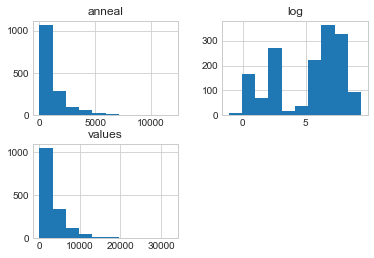

In [401]:
n='Niculescu Duvaz Bogdan Nicolae | 1948-12-14'
h=dflog[(dflog['level_0']==n)|\
     (dflog['level_1']==n)]
print(len(h))
print(np.mean(h['anneal']))
print(np.median(h['anneal']))
h.hist();

488
2234.2497502930087
2463.346443636172


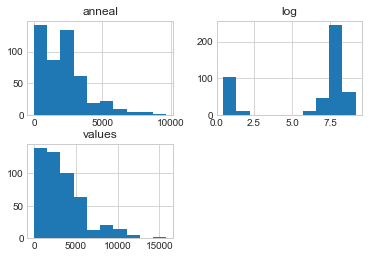

In [402]:
n='Korodi Attila | 1977-06-23'
h=dflog[(dflog['level_0']==n)|\
     (dflog['level_1']==n)]
print(len(h))
print(np.mean(h['anneal']))
print(np.median(h['anneal']))
h.hist();

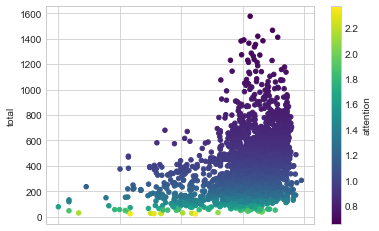

In [454]:
dfm.plot.scatter(x='mean',y='total',c='attention',colormap='viridis')

In [455]:
all_nodes=set(df.reset_index()['level_0']).union(df.reset_index()['level_1'])
nodes={}
for i in all_nodes:
    if i not in nodes:
        nodes[i]={'pr':0,'bc':0,'cf':0}

In [463]:
min_baratsag=365*2*4  #average bizottsag-barastag * hany ev
df2=df[df['anneal']>min_baratsag]
df2['log']=np.log(df2['anneal'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df20=df2.reset_index().join(dfm,on='level_0')[['level_0', 'level_1','mean','log','attention']]
df20['weight']=df20['log']/df20['attention']
df20=df20[['level_0', 'level_1','weight']]
df21=df2.reset_index().join(dfm,on='level_1')[['level_0', 'level_1','mean','log','attention']]
df21['weight']=df21['log']/df21['attention']
df21=df21[['level_1','level_0', 'weight']]
df21.columns=['level_0', 'level_1','weight']

In [ ]:
df3=pd.concat([df20,df21]).dropna()

In [ ]:
df3t=df3.set_index(['level_0','level_1']).T.to_dict()

In [ ]:
df3tl=[(i[0],i[1],df3t[i]) for i in df3t]

In [ ]:
G = nx.DiGraph()
G.add_edges_from(df3tl)

r = nx.pagerank(G,weight='weight')
mr=np.median(list(r.values()))
for i in r:
    nodes[i]['pr']=r[i]/mr
    
links={}
for i in G.edges(data=True):
    name=i[0]
    name2=i[1]
    z=i[2]['weight']
    if name not in links:links[name]={}
    if name2 not in links:links[name2]={}
    links[name][name2]=z

In [ ]:
#save 
network={'nodes':nodes,'links':links}
print(len(nodes),'nodes and',len(G.edges()),'edges')
open('ignore/plotter_name_weighted.json','w').write(json.dumps(network))
import zipfile

with zipfile.ZipFile("json/plotter_name_weighted.zip", "w", compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write("ignore/plotter_name_weighted.json",'plotter_name_weighted.json')